In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

f:\python-3.6\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data = pd.read_csv( 'crime.csv', encoding='latin-1')

data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [3]:
data.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

before handling nulls or making categorical , we need to look at unique values , so we can drop features which have a very big amount of unique values , which will never help us in categorical features

In [5]:
for column in data.columns : 
    print('Length of unique data for {0} is {1} '.format(column , len(data[column].unique())))

Length of unique data for INCIDENT_NUMBER is 282517 
Length of unique data for OFFENSE_CODE is 222 
Length of unique data for OFFENSE_CODE_GROUP is 67 
Length of unique data for OFFENSE_DESCRIPTION is 244 
Length of unique data for DISTRICT is 13 
Length of unique data for REPORTING_AREA is 879 
Length of unique data for SHOOTING is 2 
Length of unique data for OCCURRED_ON_DATE is 233229 
Length of unique data for YEAR is 4 
Length of unique data for MONTH is 12 
Length of unique data for DAY_OF_WEEK is 7 
Length of unique data for HOUR is 24 
Length of unique data for UCR_PART is 5 
Length of unique data for STREET is 4658 
Length of unique data for Lat is 18179 
Length of unique data for Long is 18179 
Length of unique data for Location is 18194 


In [6]:
data.drop(['INCIDENT_NUMBER' , 'OCCURRED_ON_DATE' ,'STREET' , 'OFFENSE_CODE' , 'REPORTING_AREA','Location','SHOOTING'],axis=1, inplace=True)

data.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat,Long
0,Larceny,LARCENY ALL OTHERS,D14,2018,9,Sunday,13,Part One,42.357791,-71.139371
1,Vandalism,VANDALISM,C11,2018,8,Tuesday,0,Part Two,42.306821,-71.060300
2,Towed,TOWED MOTOR VEHICLE,D4,2018,9,Monday,19,Part Three,42.346589,-71.072429
3,Investigate Property,INVESTIGATE PROPERTY,D4,2018,9,Monday,21,Part Three,42.334182,-71.078664
4,Investigate Property,INVESTIGATE PROPERTY,B3,2018,9,Monday,21,Part Three,42.275365,-71.090361


In [7]:
data.isnull().sum()

OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1765
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  90
Lat                    19999
Long                   19999
dtype: int64

<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='count'>

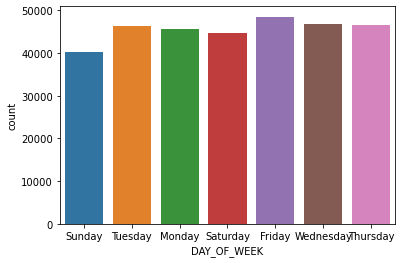

In [8]:
import seaborn as sns
sns.countplot(data['DAY_OF_WEEK'])

In [9]:
data.head(2)

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat,Long
0,Larceny,LARCENY ALL OTHERS,D14,2018,9,Sunday,13,Part One,42.357791,-71.139371
1,Vandalism,VANDALISM,C11,2018,8,Tuesday,0,Part Two,42.306821,-71.060300


<AxesSubplot:xlabel='UCR_PART', ylabel='count'>

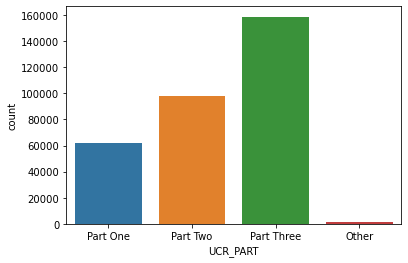

In [10]:
sns.countplot(data['UCR_PART'])

<AxesSubplot:xlabel='MONTH', ylabel='count'>

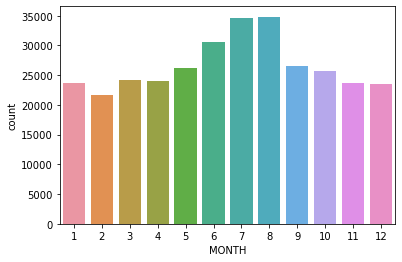

In [11]:
sns.countplot(data['MONTH'])

<AxesSubplot:xlabel='YEAR', ylabel='count'>

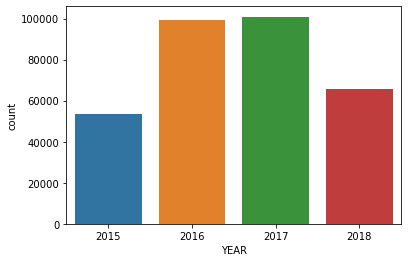

In [12]:
sns.countplot(data['YEAR'])

<AxesSubplot:>

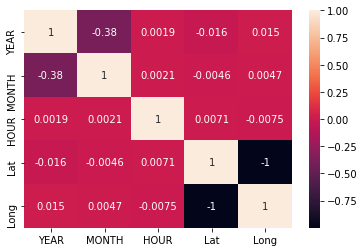

In [13]:
sns.heatmap(data.corr(),annot=True)

In [14]:
data['Lat code'] = np.round(data['Lat'],2)
data['Long code'] = np.round(data['Long'],2)

data.drop(['Lat','Long'],axis=1, inplace=True)

In [15]:
data.DISTRICT.fillna('none', inplace=True)

In [16]:
data.UCR_PART.fillna('none', inplace=True)

Get Dummies
ok , before we run the clustering model , we've to convert all categorical values into numerical dummies .

we have here five categorical features which are :

Offense Groud

Offense Description

District

Day of week

UCR Part

so we'll use LabelEncoder model from Sklearn to do it quickly , then drop the original feature .

In [17]:
data.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat code,Long code
0,Larceny,LARCENY ALL OTHERS,D14,2018,9,Sunday,13,Part One,42.36,-71.14
1,Vandalism,VANDALISM,C11,2018,8,Tuesday,0,Part Two,42.31,-71.06
2,Towed,TOWED MOTOR VEHICLE,D4,2018,9,Monday,19,Part Three,42.35,-71.07
3,Investigate Property,INVESTIGATE PROPERTY,D4,2018,9,Monday,21,Part Three,42.33,-71.08
4,Investigate Property,INVESTIGATE PROPERTY,B3,2018,9,Monday,21,Part Three,42.28,-71.09


In [18]:
from sklearn.preprocessing import LabelEncoder
enc  = LabelEncoder()
enc.fit(data['OFFENSE_CODE_GROUP'])
data['Offense Code'] = enc.transform(data['OFFENSE_CODE_GROUP'])
data.drop(['OFFENSE_CODE_GROUP'],axis=1, inplace=True)

In [19]:
enc  = LabelEncoder()
enc.fit(data['OFFENSE_DESCRIPTION'])
data['Offense Desc Code'] = enc.transform(data['OFFENSE_DESCRIPTION'])
data.drop(['OFFENSE_DESCRIPTION'],axis=1, inplace=True)

In [20]:
enc  = LabelEncoder()
enc.fit(data['DISTRICT'])
data['District Code'] = enc.transform(data['DISTRICT'])
data.drop(['DISTRICT'],axis=1, inplace=True)

In [21]:
enc  = LabelEncoder()
enc.fit(data['DAY_OF_WEEK'])
data['Day Code'] = enc.transform(data['DAY_OF_WEEK'])
data.drop(['DAY_OF_WEEK'],axis=1, inplace=True)

In [22]:
enc  = LabelEncoder()
enc.fit(data['UCR_PART'])
data['UCR Code'] = enc.transform(data['UCR_PART'])
data.drop(['UCR_PART'],axis=1, inplace=True)
data.head()

,YEAR,MONTH,HOUR,Lat code,Long code,Offense Code,Offense Desc Code,District Code,Day Code,UCR Code
0,2018,9,13,42.36,-71.14,34,129,7,3,1
1,2018,8,0,42.31,-71.06,63,230,5,5,3
2,2018,9,19,42.35,-71.07,62,222,8,1,2
3,2018,9,21,42.33,-71.08,32,123,8,1,2
4,2018,9,21,42.28,-71.09,32,123,4,1,2


<AxesSubplot:>

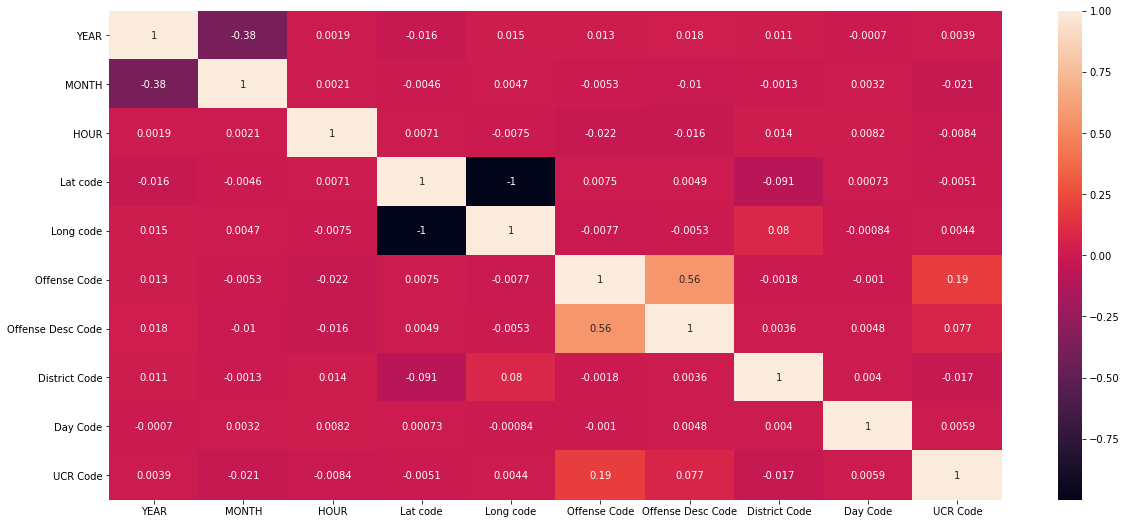

In [23]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(20, 9))
sns.heatmap(data.corr(),annot=True)

In [24]:
data['Lat code'] = data['Lat code'].fillna(data['Lat code'].mean())
data['Long code'] = data['Long code'].fillna(data['Long code'].mean())

In [25]:
data.isnull().sum()

YEAR                 0
MONTH                0
HOUR                 0
Lat code             0
Long code            0
Offense Code         0
Offense Desc Code    0
District Code        0
Day Code             0
UCR Code             0
dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train , test = train_test_split(data,test_size = 0.3,random_state= 0)

In [28]:
print('Train Shape is {}'.format(train.shape))
print('Test Shape is {}'.format(test.shape))

Train Shape is (223351, 10)
Test Shape is (95722, 10)


lets rescale the data 

In [29]:
from sklearn.preprocessing import StandardScaler


In [30]:
stand=StandardScaler()
train=stand.fit_transform(train)

# KNN model for unsupervised training

In [31]:
NearestNeighborsModel = NearestNeighbors(n_neighbors=4,radius=1.0,algorithm='auto')#it can be:ball_tree,kd_tree,brute
NearestNeighborsModel.fit(train)

NearestNeighbors(n_neighbors=4)

In [39]:
print('NearestNeighborsModel Train kneighbors are : ' , NearestNeighborsModel.kneighbors(train[: 5]))
print('----------------------------------------------------')
print('NearestNeighborsModel Train radius kneighbors are : ' , NearestNeighborsModel.radius_neighbors(train[:  1]))
print('----------------------------------------------------')
print('NearestNeighborsModel Test kneighbors are : ' , NearestNeighborsModel.kneighbors(test[: 5]))
print('----------------------------------------------------')
print('NearestNeighborsModel Test  radius kneighbors are : ' , NearestNeighborsModel.radius_neighbors(test[:  1]))
print('----------------------------------------------------')

NearestNeighborsModel Train kneighbors are :  (array([[0.        , 0.30559881, 0.32322771, 0.32438135],
       [0.        , 0.30540144, 0.32329496, 0.44066252],
       [0.        , 0.25156895, 0.25504618, 0.30540144],
       [0.        , 0.38781229, 0.38781229, 0.44059528],
       [0.        , 0.30576972, 0.32193806, 0.4042768 ]]), array([[     0, 145563, 142893, 200880],
       [     1, 197500, 122945,  71723],
       [     2, 126177,  68706, 179079],
       [     3, 203894,  27749,  43572],
       [     4, 193713,  98084,  25759]], dtype=int64))
----------------------------------------------------
NearestNeighborsModel Train radius kneighbors are :  (array([array([0.73415411, 0.75617463, 0.54503222, 0.97066111, 0.60041047,
       0.96971255, 0.91761167, 0.58902809, 0.58730601, 0.        ,
       0.81551282, 0.98390671, 0.608491  , 0.45135328, 0.91764509,
       0.57903104, 0.54496773, 0.49203162, 0.47649207, 0.68485632,
       0.94088936, 0.88570874, 0.86845891, 0.87852786, 0.3243813